In [59]:
import pandas as pd
import numpy as np
from sklearn import linear_model 
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import preprocessing
import seaborn as sn
import matplotlib.pyplot as plt
import missingno as mno


In [18]:
clevelandData = pd.read_csv("processed.cleveland.data", sep =",", header= None, na_values=["?"])
switzerlandData = pd.read_csv("processed.switzerland.data", sep= ",", header= None, na_values=["?"])
longbeachData = pd.read_csv("processed.va.data", sep = "," , header=None, na_values=["?"])
hungarianData = pd.read_csv("reprocessed.hungarian.data", sep = " " , header=None, na_values=["?"])
data = pd.concat([clevelandData, switzerlandData, longbeachData, hungarianData])
data.columns = ["age", "sex", "cp", "trestbps", "chol", "fbs" , "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "prediction"]

In [57]:
data = data.dropna(axis= 0, subset=["prediction"])
data.isnull().sum()/len(data)
data[["age", "sex","cp", "restecg","thalach", "slope", "ca" , "thal"]] = data[["age", "sex","cp", "restecg","thalach", "slope", "ca" , "thal"]].astype(int)
data[["fbs", "exang"]] = data[["fbs", "exang"]].astype(bool)
data.dtypes

data[data<0].count()
## mno.matrix(data, figsize=(20,6))


age             0
sex             0
cp              0
trestbps        1
chol           23
fbs             0
restecg         1
thalach         1
exang           0
oldpeak        12
slope         224
ca            424
thal          278
prediction      0
dtype: int64

In [58]:
nanImpute = SimpleImputer(missing_values=np.nan, strategy='mean')
dataval = nanImpute.fit_transform(data)

data = pd.DataFrame(dataval, columns=  ["age", "sex", "cp", "trestbps", "chol", "fbs" , "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "prediction"])
data[data<0].count()

age             0
sex             0
cp              0
trestbps        1
chol           23
fbs             0
restecg         1
thalach         1
exang           0
oldpeak        12
slope         224
ca            424
thal          278
prediction      0
dtype: int64

ValueError: Unknown label type: (array([0.  , 0.5 , 0.25, 0.  , 0.  , 0.  , 0.75, 0.  , 0.5 , 0.25, 0.  ,
       0.  , 0.5 , 0.  , 0.  , 0.  , 0.25, 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.25, 0.75, 1.  , 0.  , 0.  , 0.  , 0.  , 0.75, 0.  , 0.5 , 0.25,
       0.  , 0.  , 0.  , 0.75, 0.25, 0.75, 0.  , 1.  , 0.  , 0.  , 0.  ,
       0.25, 1.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.5 , 0.  , 0.25,
       0.25, 0.25, 0.25, 0.  , 0.  , 0.5 , 0.  , 0.25, 0.  , 0.5 , 0.5 ,
       0.25, 0.  , 0.5 , 0.25, 0.  , 0.75, 0.25, 0.25, 0.25, 0.  , 0.25,
       0.  , 0.  , 0.75, 0.  , 0.  , 0.  , 0.75, 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.75, 0.  , 0.  , 0.  , 0.25, 0.5 , 0.75, 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.75, 0.  , 0.5 , 0.25, 0.5 , 0.75,
       0.25, 0.25, 0.  , 0.5 , 0.5 , 0.  , 0.  , 0.  , 0.75, 0.5 , 0.75,
       1.  , 0.  , 0.75, 0.25, 0.  , 0.75, 0.75, 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 1.  , 0.75, 0.25, 0.  , 0.  , 0.25, 0.  ,
       0.25, 0.  , 0.25, 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ,
       0.75, 0.25, 0.25, 0.25, 0.5 , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.25, 0.  , 0.75, 0.  , 0.25, 0.  , 1.  , 0.25,
       0.  , 0.25, 0.  , 0.  , 0.75, 0.5 , 0.  , 0.  , 0.25, 0.  , 0.  ,
       0.5 , 0.25, 0.5 , 0.  , 0.75, 0.25, 0.5 , 0.  , 0.75, 0.  , 0.  ,
       0.  , 0.25, 0.  , 0.  , 0.  , 0.  , 0.  , 0.75, 0.75, 0.75, 0.  ,
       0.25, 0.  , 1.  , 0.  , 0.75, 0.25, 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.75, 0.25, 0.  , 0.  , 0.  , 0.75, 0.5 , 0.  ,
       0.5 , 0.25, 0.  , 0.  , 0.75, 0.5 , 0.25, 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.5 , 0.  , 0.5 , 0.5 , 0.25, 0.75, 0.  , 0.  , 0.25, 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.25, 0.  , 0.75, 0.  , 0.  ,
       1.  , 0.5 , 0.5 , 0.5 , 0.25, 0.  , 0.25, 0.  , 0.5 , 0.  , 0.25,
       0.  , 0.  , 0.  , 0.25, 0.  , 0.5 , 0.  , 0.75, 0.  , 0.5 , 1.  ,
       0.5 , 0.  , 0.  , 0.  , 0.25, 0.  , 0.5 , 0.5 , 0.25, 0.  , 0.75,
       0.25, 0.25, 0.5 , 0.75, 0.25, 0.  , 0.25, 0.25, 0.75, 0.25, 0.5 ,
       0.25, 0.  , 0.25, 0.5 , 0.25, 0.5 , 0.5 , 0.25, 0.5 , 0.75, 1.  ,
       0.5 , 0.  , 0.25, 0.25, 0.25, 0.75, 0.5 , 0.25, 0.5 , 0.25, 0.75,
       0.75, 0.25, 0.5 , 1.  , 0.75, 0.5 , 0.25, 0.5 , 0.5 , 0.5 , 0.5 ,
       0.5 , 0.5 , 0.75, 0.  , 0.25, 0.25, 0.25, 1.  , 0.5 , 0.  , 0.5 ,
       0.75, 0.25, 0.  , 0.25, 1.  , 0.5 , 0.  , 0.5 , 0.5 , 0.25, 0.5 ,
       0.5 , 0.75, 0.25, 0.25, 0.75, 0.5 , 0.75, 0.5 , 0.25, 0.25, 1.  ,
       0.25, 0.25, 0.75, 0.5 , 0.25, 0.25, 0.25, 0.75, 0.25, 0.75, 0.75,
       0.25, 0.75, 0.25, 0.25, 0.75, 0.75, 0.75, 0.25, 0.5 , 0.5 , 0.5 ,
       0.25, 0.25, 0.75, 0.5 , 0.25, 0.75, 0.25, 0.5 , 0.75, 0.75, 0.25,
       0.75, 0.25, 0.25, 0.25, 0.75, 0.  , 0.75, 0.25, 0.75, 0.5 , 0.75,
       0.25, 0.25, 0.75, 0.25, 0.75, 0.  , 0.25, 0.25, 0.5 , 0.  , 0.5 ,
       0.25, 0.  , 0.  , 0.75, 0.  , 0.75, 0.25, 0.  , 0.25, 0.25, 0.25,
       0.25, 0.  , 1.  , 0.25, 0.  , 0.  , 0.5 , 0.25, 0.75, 0.  , 0.5 ,
       0.5 , 0.5 , 0.25, 0.25, 0.75, 0.75, 0.75, 0.75, 0.75, 0.5 , 0.75,
       0.5 , 0.  , 0.25, 0.  , 0.75, 0.25, 0.75, 0.  , 1.  , 0.5 , 0.25,
       0.  , 0.5 , 0.  , 0.25, 0.  , 0.5 , 0.  , 0.25, 0.5 , 0.5 , 0.75,
       0.  , 0.25, 0.  , 0.5 , 0.25, 1.  , 0.5 , 0.5 , 0.75, 0.25, 0.25,
       0.25, 0.  , 0.5 , 0.  , 0.75, 0.75, 0.25, 0.5 , 0.75, 0.5 , 0.25,
       0.  , 0.5 , 0.5 , 0.5 , 1.  , 0.5 , 0.75, 0.  , 0.25, 0.25, 0.75,
       0.  , 0.75, 0.25, 0.  , 0.75, 0.  , 0.25, 0.25, 0.  , 0.25, 0.75,
       0.25, 0.25, 0.  , 0.75, 0.25, 0.25, 0.  , 0.  , 0.75, 0.  , 0.75,
       0.25, 0.25, 0.75, 0.5 , 0.5 , 0.75, 0.25, 0.5 , 0.75, 0.25, 0.  ,
       0.25, 1.  , 0.25, 0.5 , 0.  , 0.  , 0.25, 0.75, 0.25, 0.  , 0.75,
       0.  , 0.75, 0.75, 0.  , 0.5 , 0.  , 1.  , 0.5 , 1.  , 0.  , 0.  ,
       0.  , 0.25, 0.75, 0.75, 0.  , 0.75, 0.25, 0.25, 0.5 , 0.5 , 0.5 ,
       0.5 , 0.5 , 0.25, 1.  , 0.75, 0.75, 0.75, 0.25, 0.75, 0.5 , 0.  ,
       0.5 , 0.25, 0.25, 0.  , 0.75, 0.25, 0.  , 0.  , 1.  , 0.5 , 0.75,
       0.25, 0.25, 0.  , 0.25, 0.25, 0.  , 0.25, 0.75, 0.5 , 0.5 , 0.  ,
       0.  , 1.  , 0.75, 0.25, 0.5 , 0.25, 0.  , 0.5 , 0.  , 0.25, 0.  ,
       0.25, 0.  , 0.75, 0.  , 0.  , 0.  , 0.  , 0.25, 0.  , 0.  , 0.75,
       0.  , 0.75, 0.  , 0.  , 0.25, 0.  , 0.25, 0.25, 0.  , 0.  , 0.  ,
       0.75, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.75, 0.  , 0.25, 0.75,
       0.  , 0.  , 0.25, 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.75,
       0.  , 0.  , 0.  , 0.  , 0.25, 0.5 , 1.  , 0.  , 0.  , 0.  , 0.  ,
       0.25, 0.25, 0.  , 0.75, 0.  , 0.  , 0.  , 0.25, 0.  , 0.  , 0.  ,
       0.  , 0.75, 0.  , 0.25, 0.  , 0.5 , 0.  , 0.5 , 0.  , 0.5 , 0.  ,
       0.  , 0.25, 0.  , 0.  , 0.25, 0.  , 0.5 , 0.75, 0.75, 0.  , 0.5 ,
       0.  , 0.  , 0.  , 0.  , 0.5 , 0.  , 0.5 , 0.  , 0.  , 0.  , 0.  ,
       1.  , 0.  , 0.5 , 0.25, 0.25, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.5 , 0.  , 0.  , 0.  , 0.25, 0.25, 0.25, 0.  , 0.25, 0.75, 0.  ,
       0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.25, 0.75,
       0.75, 0.  , 0.25, 0.  , 0.  , 0.5 , 0.25, 1.  , 1.  , 1.  , 0.  ,
       0.75, 0.  , 0.  , 0.  , 0.  , 0.5 , 0.  , 0.  , 0.  , 0.  , 0.  ,
       1.  , 0.5 , 0.  , 0.75, 0.  , 0.75, 1.  , 0.  , 0.  , 0.  , 0.  ,
       0.75, 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 1.  ,
       0.75, 0.  , 0.  , 0.  , 0.25, 0.  , 0.75, 0.  , 0.  , 0.5 , 0.  ,
       0.25, 0.  , 0.75, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.5 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.25, 0.  ,
       0.25, 0.25, 0.25, 0.  , 0.  , 0.25, 0.  , 0.5 , 0.  , 0.  , 0.  ,
       0.5 , 0.25, 0.  , 0.  , 0.  , 0.25, 0.  , 0.25, 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.75, 0.5 , 0.5 , 0.  , 0.5 ,
       0.75, 0.  , 0.25, 0.  , 0.5 , 0.5 , 0.5 , 0.75, 1.  , 0.25, 0.  ,
       0.  , 0.75, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.5 , 0.75,
       0.25, 0.  , 0.75, 0.  , 0.5 , 0.  , 0.  , 0.  , 0.25, 0.  , 0.  ,
       0.  , 0.75, 0.5 , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]),)

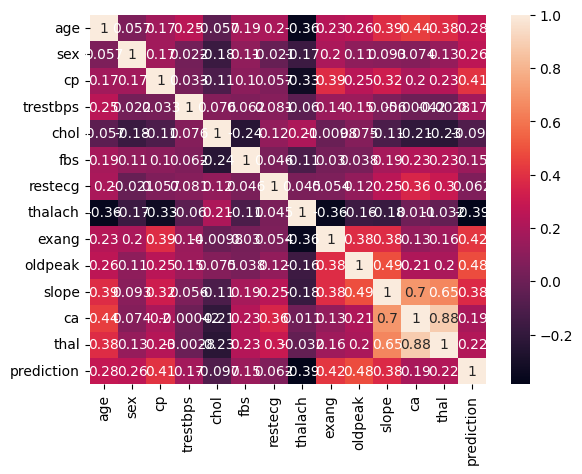

In [63]:
scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
normalizedValues = scaler.fit_transform(data)
normalizedData = pd.DataFrame(normalizedValues, columns= data.columns)
corrMatrix = normalizedData.corr()
sn.heatmap(corrMatrix, annot=True)

variables =  normalizedData.iloc[:,normalizedData.columns != "predictions"]
predictions = normalizedData["prediction"]  

